# 2.3. Parte III – Validação Holdout em Problema Não-Linearmente Separável

In [13]:
import numpy as np
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt



#Inserindo dados em um vetor e separando os dados de treino e teste.
df = np.fromfile('dataHoldout.txt')
df = np.split(df, len(df)/3)
df = np.array(df)
   

# Classe Perceptron - Treinamento

In [14]:
import numpy as np

class Perceptron(object):
    #Construtor da Classe,
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
    
    #Essa função irá separar os rótulos do vetor de entradas    
    def organiza(self, arr):
        valor = []
        labels = []
        for i  in arr:
            valor.append(i[0:2])
            labels.append(i[2])
        return valor, labels
           
    def predict(self, inputs):
        #A função dot é produto de dois arrays, o valor deste produto será somado pelos pesos
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1.0
        else:
          activation = 0.0            
        return activation

    def train(self, data):
        for _ in range(self.threshold):
            #A cada iteração faz um embaralhamento do array
            np.random.shuffle(data)
            training_inputs, labels = self.organiza(data)
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
                
    



## Apresentar um gráfico inicial que evidencie que este problema não é linearmente separável.

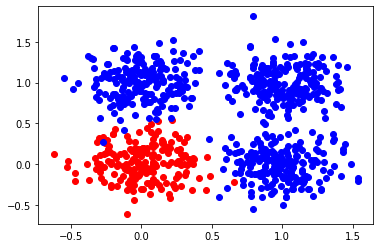

In [15]:
perceptron = Perceptron(2)
(X,Y) = perceptron.organiza(df)
cont = 0
for i in X:
    plt.plot(i[0],i[1],'ro' if (Y[cont] == 1.0) else 'bo')
    cont = cont + 1

## Dividindo em treino (70%) e teste (30%) aleatoriamente


In [16]:
np.random.shuffle(df)
total_dataset = len(df)
training, test = df[:int((total_dataset*70)/100),:], df[int((total_dataset*70)/100):,:]

In [17]:
#Treinando os 70% do dataset
perceptron.train(training)

# Aferindo a classe test

In [18]:
#Aqui organizamos os valores em dois arrays: inputs e valores_reais do conjunto de teste
inputs, valores_reais = perceptron.organiza(test)
#Saída esperada
print(valores_reais)

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,

In [19]:
valores_preditos = []
for i in inputs:
    valores_preditos.append(perceptron.predict(i))
#Saídas preditas pelo modelo
print (valores_preditos)

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,

# 2.3.1 Matriz de confusão

In [20]:
print(confusion_matrix(valores_reais,valores_preditos))

[[172  10]
 [  5  53]]


# 2.3.2.1 Acurácia

In [21]:
print(accuracy_score(valores_reais,valores_preditos))

0.9375


# 2.3.2.2 Precisão

In [22]:
print(precision_score(valores_reais,valores_preditos))

0.8412698412698413


# 2.3.2.3 Revocação

In [23]:
print(recall_score(valores_reais,valores_preditos))

0.9137931034482759


# 2.3.2.4 F-score

In [24]:
print(f1_score(valores_reais,valores_preditos))

0.8760330578512397


# 2.3.4 A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes 

Olhando os valores dos calculos do despenho do nosso modelo, acreditamos que a qualidade foi boa. De um modo geral o neurônio em questão foi bem assertivo, como podemos constatar olhando as métricas superiores a 85%.

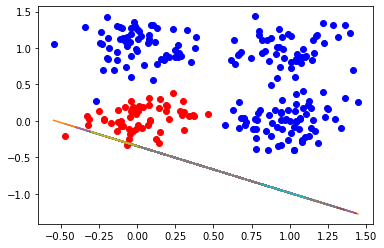

In [25]:
(X_training, Y_training) = perceptron.organiza(test) 
#perceptron.train(training)
cont = 0
for i in X_training:
    plt.plot(i[0],i[1],'ro' if (Y_training[cont] == 1.0) else 'bo')
    cont = cont + 1
for i in range(len(X_training)):#np.linspace(np.amin(X),np.amax(X)):
    x = X_training[i]
    yi = (perceptron.weights[0]/perceptron.weights[2]) - (perceptron.weights[1]/perceptron.weights[2]) * x
    plt.plot(x,yi)

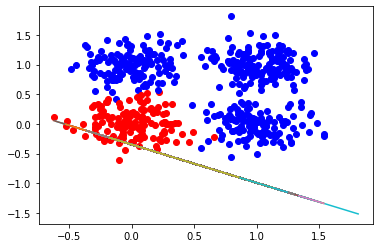

In [26]:
(X_training, Y_training) = perceptron.organiza(training) 
#perceptron.train(training)
cont = 0
for i in X_training:
    plt.plot(i[0],i[1],'ro' if (Y_training[cont] == 1.0) else 'bo')
    cont = cont + 1
for i in range(len(X_training)):#np.linspace(np.amin(X),np.amax(X)):
    x = X_training[i]
    yi = (perceptron.weights[0]/perceptron.weights[2]) - (perceptron.weights[1]/perceptron.weights[2]) * x
    plt.plot(x,yi)